In [7]:
# rich output 출력위치 설정
# => 웹 브라우저에서 바로 봄
get_ipython().run_line_magic('matplotlib', 'inline')

# 색상 출력
# 설치 방법 => pip install termcolor
from termcolor import colored
def c(tag, data, under=3):

    val = colored(tag + ':\n', 'magenta', attrs=['bold'])
    t = type(data)
    val += colored(t, 'magenta')
    under = str(under)
    
    import numpy
    if t is float or t is numpy.float64:
        val += ('\n{:.' + under + 'f}\n').format(data)
    else:
        val += '\n{}\n'.format(data)
    return val

### <span style="color:#26C;background:#EEE">2.3. 지도학습 알고리즘</span><br>

#### <span style="color:#184;background:#EEE">2.3.1. 예제에 사용할 데이터셋</span><br>

- **<span style="color:#C22">forge</span>**
    - 인위적, 두 개의 특성, 이진 분류문제

X shape:
<class 'tuple'>
(26, 2)

y shape:
<class 'tuple'>
(26,)

X data:
<class 'numpy.ndarray'>
[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]]

y data:
<class 'numpy.ndarray'>
[1 0 1 0 0 1 1 0 1 1]



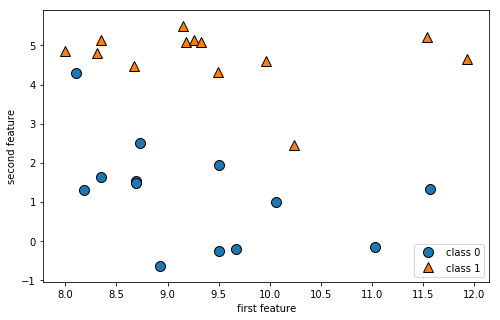

In [8]:
import sys
sys.path.append('..')
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()

print(c('X shape', X.shape))
print(c('y shape', y.shape))

# 10개만
print(c('X data', X[:10, :]))
print(c('y data', y[:10]))

plt.figure(figsize=(8, 5))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['class 0', 'class 1'], loc=4)
plt.xlabel('first feature')
plt.ylabel('second feature')
plt.show()

- **<span style="color:#C22">wave</span>**
    - 인위적, 하나의 특성, 회귀문제 = 연속적인 타겟(출력)

X shape:
<class 'tuple'>
(40, 1)

y shape:
<class 'tuple'>
(40,)

X data:
<class 'numpy.ndarray'>
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]

y data:
<class 'numpy.ndarray'>
[-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632 -2.47196233
 -1.52730805  1.49417157  1.00032374  0.22956153]



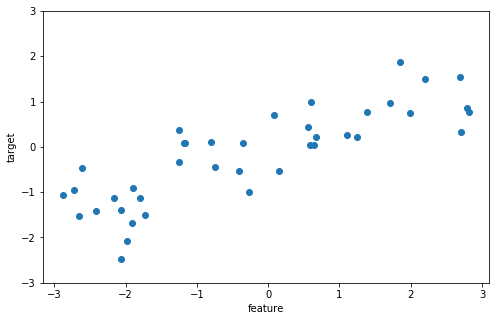

In [9]:
import sys
sys.path.append('..')
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_wave(n_samples=40)

print(c('X shape', X.shape))
print(c('y shape', y.shape))

# 10개만
print(c('X data', X[:10, :]))
print(c('y data', y[:10]))

plt.figure(figsize=(8, 5))
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('feature')
plt.ylabel('target')
plt.show()

- **<span style="color:#C22">Wisconsin Breast Cancer</span>**
    - 위스콘신 유방암 데이터
    - 실제, 30개의 특성, 이진 분류문제
        - 양성/악성(benign/malignant) 구별

In [10]:
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(c('cancer keys', cancer.keys()))
print(c('X shape', cancer.data.shape))
print(c('y shape', cancer.target.shape))
print(c('num of samples', {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print(c('num of features', len(cancer.feature_names)))
print(c('feature names', cancer.feature_names))

cancer keys:
<class 'dict_keys'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

X shape:
<class 'tuple'>
(569, 30)

y shape:
<class 'tuple'>
(569,)

num of samples:
<class 'dict'>
{'malignant': 212, 'benign': 357}

num of features:
<class 'int'>
30

feature names:
<class 'numpy.ndarray'>
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']



- **<span style="color:#C22">Boston Housing</span>**
    - 보스턴 주택가격 데이터
    - 실제, 13개의 특성, 회귀문제
        - 평균주택가격 예측

In [11]:
from sklearn.datasets import load_boston
boston = load_boston()

print(c('boston keys', boston.keys()))
print(c('X shape', boston.data.shape))
print(c('y shape', boston.target.shape))
print(c('num of features', len(boston.feature_names)))
print(c('feature names', boston.feature_names))

boston keys:
<class 'dict_keys'>
dict_keys(['data', 'target', 'feature_names', 'DESCR'])

X shape:
<class 'tuple'>
(506, 13)

y shape:
<class 'tuple'>
(506,)

num of features:
<class 'int'>
13

feature names:
<class 'numpy.ndarray'>
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']



- load_extended_boston 함수를 사용하면 "확장된" 특성의 boston 데이터를 가져올 수 있음
- 특성 간의 곱을 새로운 특성으로 간주 => **특성 공학(feature engineering)** 이라고 함
- 자세한 내용은 4장에서...

In [12]:
import sys
sys.path.append('..')
import mglearn

X, y = mglearn.datasets.load_extended_boston()

print(c('X shape', X.shape))
print(c('y shape', y.shape))

X shape:
<class 'tuple'>
(506, 104)

y shape:
<class 'tuple'>
(506,)

